In [576]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

from ipywidgets import interact

In [764]:
N = 100
F_max = 1.0
sigma = 3.0

def f(v): # [0, 1]
    return round(v * N) # [0, N]

def f_inv(x):
    v_ = v = x / N # [0, 1]
    v = v * 2.0 - 1.0 # [-1, 1]
    v = v * math.pi # [-two pi, two pi]
    v = math.cos(v) # [-1, 1]
    v = v + 1.0 # [0, 2]
    v = v / 2.0 # [0, 1]
    return v

def wrap(i):
    if i < 0.0:
        return i + N
    elif i >= N:
        return i - N
    else:
        return i

def fill(p, v):
    for i in range(0, N):
        d = abs(i - f(v))
        x = F_max * math.exp(-1.0 * ((d**2) / (2.0 * (sigma**2))))
        p[i] += x
    return p

def vote(population):
    num = 0.0
    for i in range(0, N):
        num += f_inv(i) * population[i]
    den = 0.0
    for i in range(0, N):
        den += population[i]
    return num / den

In [765]:
print([f(v) for v in np.arange(0.0, 1.1, 0.1)])
print([f_inv(f(v)) for v in np.arange(0.0, 1.1, 0.1)])

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
[0.0, 0.09549150281252633, 0.34549150281252633, 0.6545084971874737, 0.9045084971874737, 1.0, 0.9045084971874737, 0.6545084971874738, 0.3454915028125262, 0.09549150281252633, 0.0]


In [766]:
for v in np.arange(0.0, 1.1, 0.1):
    population = np.zeros(N)
    fill(population, v)

    voted = vote(population)
    expected = f_inv(f(v))
    err = abs(expected - voted)
    print("val", v, "vote", voted, "expect", expected, "err", err)

val 0.0 vote 0.0077708360763 expect 0.0 err 0.0077708360763
val 0.1 vote 0.102636236863 expect 0.09549150281252633 err 0.00714473405003
val 0.2 vote 0.348212152635 expect 0.34549150281252633 err 0.00272064982243
val 0.3 vote 0.651787847366 expect 0.6545084971874737 err 0.00272064982127
val 0.4 vote 0.897385743484 expect 0.9045084971874737 err 0.00712275370357
val 0.5 vote 0.991195792235 expect 1.0 err 0.0088042077646
val 0.6 vote 0.897385743484 expect 0.9045084971874737 err 0.00712275370357
val 0.7 vote 0.651787847366 expect 0.6545084971874738 err 0.00272064982127
val 0.8 vote 0.348212152645 expect 0.3454915028125262 err 0.00272064983277
val 0.9 vote 0.102689040138 expect 0.09549150281252633 err 0.0071975373256
val 1.0 vote 0.010154570233 expect 0.0 err 0.010154570233


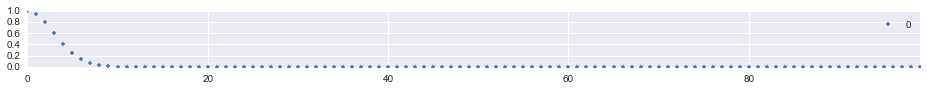

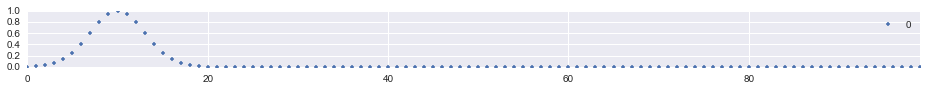

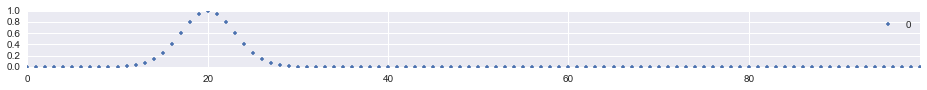

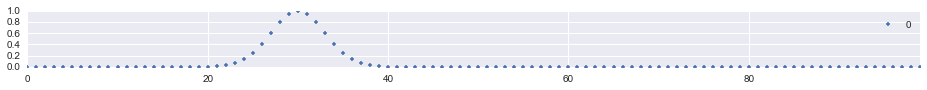

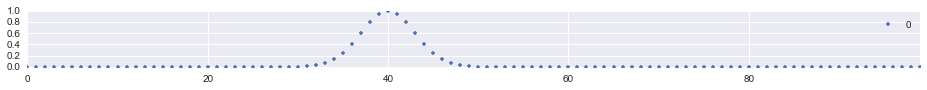

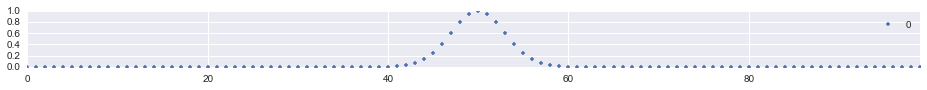

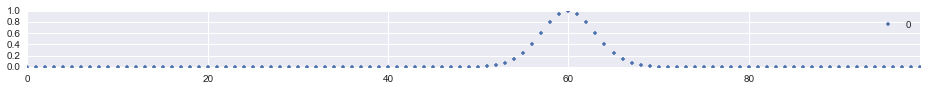

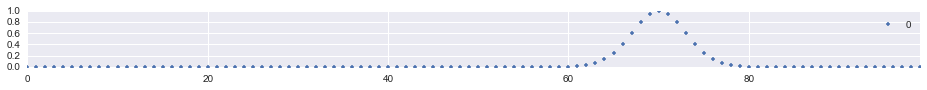

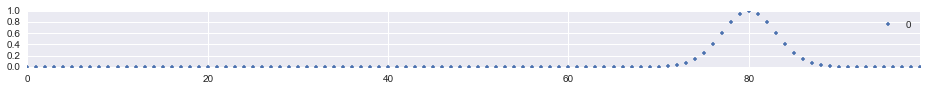

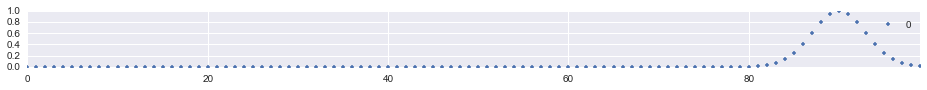

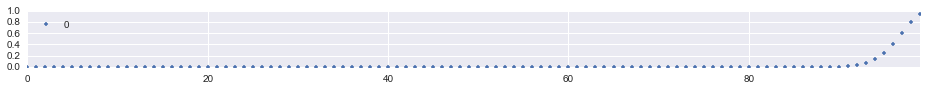

In [767]:
for v in np.arange(0.0, 1.1, 0.1):
    population = np.zeros(N)
    fill(population, v)
    df = pd.DataFrame(population)
    df.plot(style=".", figsize=(16, 1))